In [0]:
!pip install scikit-plot

In [0]:
from sklearn.datasets import load_breast_cancer

import pandas as pd
import numpy as np


np.random.seed(56)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
%matplotlib inline


#import scikitplot as scplot  # I'll use it for clustering based problems

In [0]:
raw_data = load_breast_cancer()
X = raw_data.data
Y = raw_data.target

In [0]:
raw_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
print(raw_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
scaled_data = StandardScaler().fit(X).fit_transform(X)
print(scaled_data.shape)
X = scaled_data

(569, 30)


In [0]:
print(X.shape,Y.shape)
print(X is scaled_data)

(569, 30) (569,)
True


In [0]:
df = pd.DataFrame(X,columns=raw_data.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


In [0]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [0]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(455, 30) (114, 30) (455,) (114,)


# Cross Validation

In [0]:
kf = KFold(n_splits = 10)

In [0]:
for i,j in kf.split(X_train):
    print("training_set : ",i)
    print("test_set : ",j)
    print('\n')


training_set :  [ 46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 28

In [0]:
cv_score_list = []
std_dev_list = []



## RandomForestClassifier

In [0]:
rfc = RandomForestClassifier()
cv_score = cross_val_score(rfc, X_train, Y_train, cv=kf, scoring='accuracy')

"""print("avg. cv_score",np.mean(cv_score))
print("std. dev ",np.std(cv_score))"""
cv_score_list.append(np.mean(cv_score))
std_dev_list.append(np.std(cv_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

## ExtraTreesClassifier

In [0]:
etc = ExtraTreesClassifier()
cv_score = cross_val_score(etc, X_train, Y_train, cv=kf, scoring='accuracy')

cv_score_list.append(np.mean(cv_score))
std_dev_list.append(np.std(cv_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

## SVC

In [0]:
svm_model = SVC()
cv_score = cross_val_score(svm_model, X_train, Y_train, cv=kf, scoring='accuracy')

cv_score_list.append(np.mean(cv_score))
std_dev_list.append(np.std(cv_score))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

## LogisticRegression

In [0]:
lg = LogisticRegression()
cv_score = cross_val_score(lg, X_train, Y_train, cv=kf, scoring='accuracy')
cv_score_list.append(np.mean(cv_score))
std_dev_list.append(np.std(cv_score))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
data = {
    'mean_cv_score' : cv_score_list,
    'std dev' : std_dev_list
}

df_model = pd.DataFrame(data,index=['rfc','etc','svm','lg'])
df_model

,mean_cv_score,std dev
rfc,0.951739,0.021266
etc,0.951836,0.025172
svm,0.969469,0.029461
lg,0.975990,0.024683


# Voting

In [0]:
from sklearn.ensemble import VotingClassifier

In [0]:
compiled_model = VotingClassifier(estimators=[('etc',etc),('lr',lg),('svm',svm_model)],voting='hard')

cv_score = cross_val_score(compiled_model, X_train, Y_train, cv=kf, scoring='accuracy')
cv_score_list.append(np.mean(cv_score))
std_dev_list.append(np.std(cv_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sk

In [0]:
data = {
    'mean_cv_score' : cv_score_list,
    'std dev' : std_dev_list
}

df_model = pd.DataFrame(data,index=['RandomForestClassifier',
                                    'ExtraTreesClassifier',
                                    'SVC','LogisticRegression',
                                    'compiled_model("etc","lr","svm")'])
df_model.index.name = 'model'
df_model

,mean_cv_score,std dev
model,,
RandomForestClassifier,0.951739,0.021266
ExtraTreesClassifier,0.951836,0.025172
SVC,0.969469,0.029461
LogisticRegression,0.975990,0.024683
"compiled_model(""etc"",""lr"",""svm"")",0.980435,0.026536


In [0]:
stat1 = df_model

In [0]:
df_model.index

Index(['RandomForestClassifier', 'ExtraTreesClassifier', 'SVC',
       'LogisticRegression', 'compiled_model("etc","lr","svm")'],
      dtype='object', name='model')

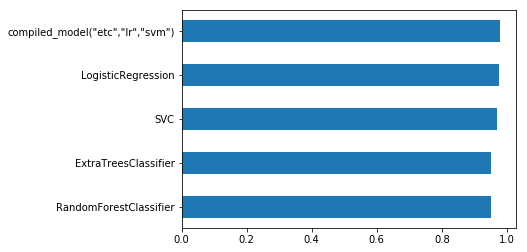

In [0]:
plt.barh(df_model.index,cv_score_list,height=0.5)
plt.show()

### Stacking yeild maximum accuracy of 98.04 with algorithms ExtratreesClassifier, Logisticregression and svm. 
Now we'll optimize these models 

In [0]:
# create an empty list to store scores of models with their hyperparameters
cv_score_list = []
std_dev_list = []

## Tuning ExtratreesClassifier

In [0]:
etc.get_params

<bound method BaseEstimator.get_params of ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators='warn',
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)>

In [0]:
# No. of trees in ExtraTreesClassifier
n_estimators = [int(x) for x in np.linspace(start=100,stop=500,num=15)]
print(n_estimators)

# No. of features to consider  at every split
max_features = ['auto','sqrt','log2',None]
print(max_features)

# Maxm no. of levels in tree
max_depth = [int(i) for i in np.linspace(start=10,stop=150)]
max_depth.append(None)
print(max_depth)

#Minm no. of samples to split a node
min_samples_split=[2,3,4,5,10]

# Minm no. of samples required at each leaf node
min_samples_leaf = [1,2,4]

# methods for selecting samples for traning  each tree
bootstrap = [True,False]

# create param_grid
param_grid = dict(n_estimators = n_estimators,
                 max_features = max_features,
                 max_depth = max_depth,
                 min_samples_split = min_samples_split,
                 min_samples_leaf = min_samples_leaf,
                 bootstrap = bootstrap)

print (param_grid)

# cross validation using RandomizedSearchCV
rscv =  RandomizedSearchCV(etc,param_grid,cv=kf,scoring='accuracy',random_state=10)



[100, 128, 157, 185, 214, 242, 271, 300, 328, 357, 385, 414, 442, 471, 500]
['auto', 'sqrt', 'log2', None]
[10, 12, 15, 18, 21, 24, 27, 30, 32, 35, 38, 41, 44, 47, 50, 52, 55, 58, 61, 64, 67, 70, 72, 75, 78, 81, 84, 87, 90, 92, 95, 98, 101, 104, 107, 110, 112, 115, 118, 121, 124, 127, 130, 132, 135, 138, 141, 144, 147, 150, None]
{'n_estimators': [100, 128, 157, 185, 214, 242, 271, 300, 328, 357, 385, 414, 442, 471, 500], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [10, 12, 15, 18, 21, 24, 27, 30, 32, 35, 38, 41, 44, 47, 50, 52, 55, 58, 61, 64, 67, 70, 72, 75, 78, 81, 84, 87, 90, 92, 95, 98, 101, 104, 107, 110, 112, 115, 118, 121, 124, 127, 130, 132, 135, 138, 141, 144, 147, 150, None], 'min_samples_split': [2, 3, 4, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
rscv

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction...
                                                      27, 30, 32, 35, 38, 41,
                

In [0]:
rscv.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction...
                                                      27, 30, 32, 35, 38, 41,
                

In [0]:
rscv.best_params_

{'bootstrap': True,
 'max_depth': 144,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 442}

In [0]:
etc2 = ExtraTreesClassifier(n_estimators=442,max_depth=144,
                          max_features=None,min_samples_leaf=1,
                          min_samples_split=3,
                          bootstrap = True)

In [0]:
cv_score = cross_val_score(etc2,X_train,Y_train,cv=kf)
print(np.mean(cv_score))
cv_score_list.append(np.mean(cv_score))
std_dev_list.append(np.std(cv_score))

0.9759420289855072


## Tuning LogisticRegression

In [0]:
lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# specify the norm used for penalization
penalty = ['l1']

C = [float(1*10**i) for i in range(-3,4)]
print(C)

fit_intercept = [True,False]

solver = ['liblinear', 'saga']

warm_state = [True,False]

dual = [True,False]

# create grid
param_grid = dict(C = C, penalty = penalty,
                 fit_intercept = fit_intercept,
                 solver = solver)
# cross validation using RandomizedSearchCV
rscv =  RandomizedSearchCV(lg,param_grid,cv=kf,scoring='accuracy',random_state=10)

rscv.fit(X_train,Y_train)
  

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0],
                                        'fit_intercept': [True, F

In [0]:
rscv.best_params_

{'C': 0.1, 'fit_intercept': False, 'penalty': 'l1', 'solver': 'saga'}

In [0]:
lg2 = LogisticRegression(C=1.0,fit_intercept=False,penalty='l1',solver='saga')
cv_score = cross_val_score(lg2,X_train,Y_train,cv=kf)
print(np.mean(cv_score))
cv_score_list.append(np.mean(cv_score))
std_dev_list.append(np.std(cv_score))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

0.9803381642512077


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# # Tuning SVC

In [0]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
C = [float(1*10**i) for i in range(-3,4)]
class_weight = ['balanced',None]
decision_function_shape = [ 'ovo', 'ovr']
kernel = ['rbf','poly','linear']
degree = [int(x) for x in range(1,5)]
gamma = ['scale','auto_deprecated']
probability = [True,False]
shrinking = [True,False]
tol = [float(1*10**i) for i in range(-5,4)]
print(tol)
verbose = [True,False]

# create grid
param_grid = dict(C = C,
                 class_weight = class_weight,
                 decision_function_shape = decision_function_shape,
                 kernel = kernel,
                 degree = degree,
                 gamma = gamma,
                 probability = probability,
                 shrinking = shrinking,
                 tol = tol,
                 verbose = verbose)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


In [0]:
rscv = RandomizedSearchCV(svm_model,param_grid,cv=kf,random_state=10)

In [0]:
rscv.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=...
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [1, 2, 3, 4],
                                        'gamma': ['scale', 'auto_deprecated'],
                                        'kernel': ['rbf', 'poly', 'linear'],
                                  

In [0]:
rscv.best_params_

{'C': 100.0,
 'class_weight': None,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 'auto_deprecated',
 'kernel': 'poly',
 'probability': True,
 'shrinking': False,
 'tol': 0.1,
 'verbose': False}

In [0]:
svm_model2 = SVC(C=100.0,tol=0.1,kernel='poly',gamma='auto_deprecated',
               decision_function_shape='ovr',degree=1,class_weight=None,
               probability=True,shrinking=False,verbose=False)

cv_score = cross_val_score(svm_model2,X_train,Y_train,cv=kf)
print(np.mean(cv_score))
cv_score_list.append(np.mean(cv_score))
std_dev_list.append(np.std(cv_score))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9760386473429952


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

### Now compile above models with their own hyperparameters

In [0]:
compiled_model2 = VotingClassifier(estimators=[('etc',etc2),('svm',svm_model2),('lg',lg2)],voting='hard')

cv_score = cross_val_score(compiled_model2, X_train, Y_train, cv=kf, scoring='accuracy')
print(np.mean(cv_score))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge"

0.9825603864734299


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
cv_score_list.append(np.mean(cv_score))
std_dev_list.append(np.std(cv_score))

In [0]:
# presenting performance of model in tabular form
data = {
    'mean_cv_score' : cv_score_list,
    'std dev' : std_dev_list
}

df_model = pd.DataFrame(data,index=[
                                    'ExtraTreesClassifier',
                                    'SVC','LogisticRegression',
                                    'compiled_model("etc","lr","svm")'])
df_model.index.name = 'model'
stat2 = df_model

In [0]:

stat1

,mean_cv_score,std dev
model,,
RandomForestClassifier,0.951739,0.021266
ExtraTreesClassifier,0.951836,0.025172
SVC,0.969469,0.029461
LogisticRegression,0.975990,0.024683
"compiled_model(""etc"",""lr"",""svm"")",0.980435,0.026536


In [0]:
stat2

,mean_cv_score,std dev
model,,
ExtraTreesClassifier,0.975942,0.020494
SVC,0.980338,0.022706
LogisticRegression,0.976039,0.029883
"compiled_model(""etc"",""lr"",""svm"")",0.982560,0.023423


# Feature Extraction

In [0]:
x,y =[],[]
etc2.fit(X_train,Y_train)
f = list(zip(raw_data.feature_names,etc2.feature_importances_))
k  = lambda s: s[1]
f = sorted(f,key=k,reverse=True)
for i,j in f:
  y.append(i)
  x.append(j)
  

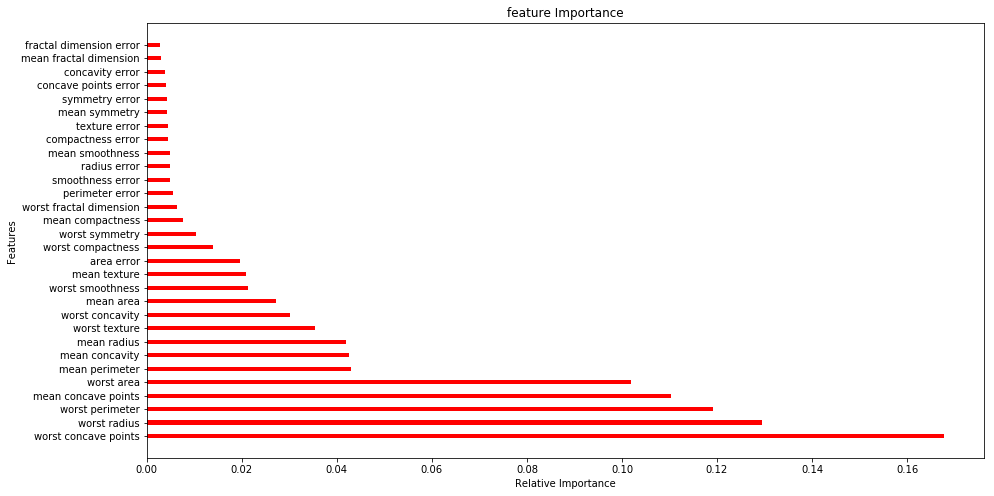

In [0]:
plt.figure(figsize=(15,8))
plt.title("feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.barh(y,x,height=.3,color='r')

plt.show()

In [0]:

feature_col = [i for i,j in f[:10]] 
d = dict().fromkeys(feature_col)
for i in list(d.keys()):
  d[i] = df[i]
df2 = pd.DataFrame(d)
print(df2.shape)
df2.head()

X_new = df[feature_col]
X_new.head()
X.shape
print(X_new.shape)
X_train,X_test, Y_train, Y_test = train_test_split(X_new,Y,test_size=0.2)
cv_score = cross_val_score(compiled_model2,X_train,Y_train,cv=kf)
print(np.mean(cv_score))
print(np.mean(cv_score))
compiled_model2.fit(X_train,Y_train,)
y_pred = compiled_model2.predict(X_test)


(569, 10)
(569, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge"

0.962657004830918
0.962657004830918
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
print(accuracy_score(Y_test,y_pred))

1.0


## Result Analysis

\

In [0]:
from collections import Counter
import pandas as pd
Y = pd.DataFrame(Y)
Y.count()

0    569
dtype: int64

In [0]:
isof = IsolationForest().fit(X_train).pred

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

# Accuracy = 99.12%
Selecting the 22 most relative important feautures for the model yeilded accuracy of 99.12%

# Classification  Accuracy

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)

[[40  0]
 [ 0 74]]


In [0]:
print("TP: ",matrix[1,1]) # sama as matrix[1][1]
print("TN: ",matrix[0,0])
print("FP: ",matrix[0,1])
print("FN: ",matrix[1,0])

TP:  74
TN:  40
FP:  0
FN:  0


In [0]:
# Detecting the False Positive values
# compare Y_test and y_pred

total = 0
for i,j in enumerate(Y_test):
    if Y_test[i] != y_pred[i]:
        total+=1
        print("index : ",i)
print('no. of false predictions =',total)

no. of false predictions = 0


## Classification Report

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(Y_test,y_pred,target_names=raw_data.target_names))

              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00        40
      benign       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



#### Serialization using pickle
Serialization means converting a object into stream of bytes so to recover the object if it is get lost.

In [0]:
import pickle

In [0]:
pickle.dump(compiled_model2,file=open('BC_detection.pkl','wb'))

In [0]:
BC_model = pickle.load(file=open('BC_detection.pkl','rb'))

In [0]:
BC_model

VotingClassifier(estimators=[('etc',
                              ExtraTreesClassifier(bootstrap=True,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=144,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=3,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=442,
                                                   n_jobs=None, oob_score=False,
                     

# Thank you